# Mandatory Exercise - Session 4

### Students: Nafis Banirazi & Jan Carbonell

### Lab Objective:
The Objective of this lab is to train, test and benchmark the outcome of different Part of Speech (POS) models against the threebank corpus. 


In [1]:
# initial imports. Could also be done in the pc environment
import nltk
import dill
from nltk.corpus import treebank
import timeit

# additional dependencies from each model
from nltk.tag import tnt
from nltk.tag import CRFTagger
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag.perceptron import PerceptronTagger

Setting the initial conditions stated in the problem, starting the dictionary with each of the model tags, create an array with the stopping points of the training set and the test data from sentences 3001 and onwards. 

In [2]:
train_stop = [500, 1000, 1500, 2000, 2500, 3000]
test_data = treebank.tagged_sents()[3001:]

accuracy = {'HMM':[], 'TnT':[], 'PER':[], 'CRF':[]}
time = {'HMM':[], 'TnT':[], 'PER':[], 'CRF':[]}

We then train the different models and add each of the test results to the dictionary. The reason why we want to evaluate the performance of the test data is to measure how well the model behaves against an unkown set of words. If we were to compare against the training data, with each step its accuary would increase -eventually reaching 100%- but this wouldn't necessarly mean that it is also suitable for unknown words, as the solutions would tend to overfit as we feed them more and more data. 

Print statements are implemented inside and at the end of the loop to ensure the correct functioning of the snippet and integrity of the data.

In [3]:
for e in train_stop:
    #reviewing that we are on the right track
    print('Training with {} sentences'.format(e))
    
    train_data = treebank.tagged_sents()[:e]
    
    #HMM
    start = timeit.default_timer()
    trainer = HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(train_data)
    accuracy['HMM'] += [round(HMM.evaluate(test_data), 3)]
    stop = timeit.default_timer()
    time['HMM'] += [round(stop - start, 3)]
    
    #TNT
    start = timeit.default_timer()
    TnT = tnt.TnT()
    TnT.train(train_data)
    accuracy['TnT'] += [round(TnT.evaluate(test_data), 3)]
    stop = timeit.default_timer()
    time['TnT'] += [round(stop - start, 3)]
        
    #PER
    start = timeit.default_timer()
    PER = PerceptronTagger(load=False)
    PER.train(train_data)
    accuracy['PER'] += [round(PER.evaluate(test_data), 3)]
    stop = timeit.default_timer()
    time['PER'] += [round(stop - start, 3)]
    
    #CRF
    start = timeit.default_timer()
    CRF = CRFTagger()
    CRF.train(train_data, 'crf_tagger_model')
    accuracy['CRF'] += [round(CRF.evaluate(test_data), 3)]
    stop = timeit.default_timer()
    time['CRF'] += [round(stop - start, 3)]
    
#verification that it is properly stored
for keys,values in accuracy.items():
    print(keys, values)
    
for keys,values in time.items():
    print(keys, values)

Training with 500 sentences
Training with 1000 sentences
Training with 1500 sentences
Training with 2000 sentences
Training with 2500 sentences
Training with 3000 sentences
HMM [0.173, 0.221, 0.262, 0.304, 0.335, 0.369]
TnT [0.747, 0.796, 0.828, 0.849, 0.862, 0.876]
PER [0.913, 0.932, 0.941, 0.949, 0.953, 0.959]
CRF [0.91, 0.925, 0.933, 0.939, 0.943, 0.948]
HMM [6.732, 7.646, 9.657, 9.606, 9.954, 10.584]
TnT [13.634, 38.633, 59.903, 82.951, 97.181, 110.017]
PER [4.779, 10.625, 10.601, 15.74, 26.481, 22.321]
CRF [4.653, 11.319, 20.135, 32.41, 45.551, 54.945]


We then plot the results, not only to better visualize the specific x and y coordinates that we have obtained and store but also to connect the dots and evaluate the overall increase in performance and benchmarking against the other models. 

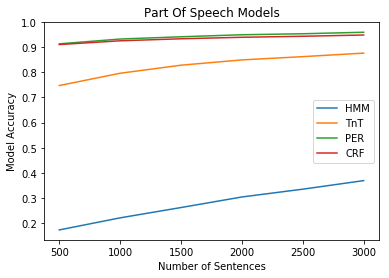

In [6]:
#adding the necessary packages for plotting
import matplotlib.pyplot as plt

#preparing and plotting the accuracy graph
x = train_stop
plt.figure()
plt.plot(x, accuracy['HMM'], label='HMM')
plt.plot(x, accuracy['TnT'], label='TnT')
plt.plot(x, accuracy['PER'], label='PER')
plt.plot(x, accuracy['CRF'], label='CRF')

#adding the legend showing the plot
plt.xlabel('Number of Sentences')
plt.ylabel('Model Accuracy')
plt.title('Part Of Speech Models')
plt.legend()
plt.show()

<b>Which model would you select?</b> Justify the answer.

Based on the initial graph, both CRF and PER seem like the better performing algorithms. If we could only make a decision based on this data, we would pick the Perceptron model.

In order to pick the best overall model, another relevant measure is the speed of the system. Because of this, we also have implemented a timer in between each of the models and will plot it accordingly to figure out which algorithms were more effective. 

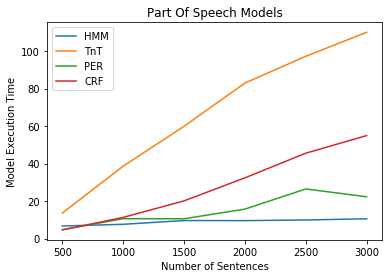

In [7]:
#preparing and plotting the accuracy graph
x = train_stop
plt.figure()
plt.plot(x, time['HMM'], label='HMM')
plt.plot(x, time['TnT'], label='TnT')
plt.plot(x, time['PER'], label='PER')
plt.plot(x, time['CRF'], label='CRF')

#adding the legend showing the plot
plt.xlabel('Number of Sentences')
plt.ylabel('Model Execution Time')
plt.title('Part Of Speech Models')
plt.legend()
plt.show()

In this case, PER seems to be the most effective -accuracy wise- and second most time efficient algorithm. After having performed this additional execution time analysis <b> we are reinsured in our conclusion to pick the Perceptron Model.</b> 

## Conclusions
Over the development of this lab, we have implemented 4 different POS Models, tested them with different segments of the treebank corpus and trained them with another set of segments. From those results, we have plotted their performanced based on accuracy and execution time and have selected the best performing model for this specific case, which happened to be the Perceptron Model. 

Another thing to highlight is that the HiddenMarkovModel looks really efficient timewise. It is likely that its just not in the desired set of conditions regarding the amount of data to perform correctly. 
